In [1]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
bikes = pd.read_csv('./data/bikes.csv', sep=';', parse_dates=['Date'], encoding='latin-1', dayfirst=True, index_col='Date')
bikes.shape
bikes.head()
bikes.isnull().any()

(310, 9)

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


Berri 1                                False
Brébeuf (données non disponibles)       True
Côte-Sainte-Catherine                  False
Maisonneuve 1                          False
Maisonneuve 2                          False
du Parc                                False
Pierre-Dupuy                           False
Rachel1                                False
St-Urbain (données non disponibles)     True
dtype: bool

In [3]:
# dropna默认是删掉行, axis=1删除列，any是只要有一个就删除,all是所有的都是NaN才删除
bikes.dropna(how="all", axis=1).head()
bikes.dropna(how="all", axis=1).shape

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


(310, 7)

In [4]:
# 对于缺失的数据，我们未必要直接删除，可以考虑用fillna把这一行的平均数填上
bikes.T.fillna(bikes.T.mean(0)).T.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35.0,25.142857,0.0,38.0,51.0,26.0,10.0,16.0,25.142857
2012-01-02,83.0,58.142857,1.0,68.0,153.0,53.0,6.0,43.0,58.142857
2012-01-03,135.0,91.285714,2.0,104.0,248.0,89.0,3.0,58.0,91.285714
2012-01-04,144.0,108.428571,1.0,116.0,318.0,111.0,8.0,61.0,108.428571
2012-01-05,197.0,122.571429,2.0,124.0,330.0,97.0,13.0,95.0,122.571429


**一周当中每天Berri 1的数量分布**

In [5]:
berri_bikes = bikes[["Berri 1"]]
berri_bikes.head()
berri_bikes.index

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [6]:
# 获取日期对应的星期几
berri_bikes.loc[:, "weekday"] = berri_bikes.index.weekday
berri_bikes.head()

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


,Berri 1
weekday,
0,2984.400000
1,3075.113636
2,3476.636364
3,3639.340909
4,3222.068182
5,2308.590909
6,2206.888889


,Berri 1
Monday,2984.400000
Tuesday,3075.113636
Wednesday,3476.636364
Thursday,3639.340909
Friday,3222.068182
Saturday,2308.590909
Sunday,2206.888889


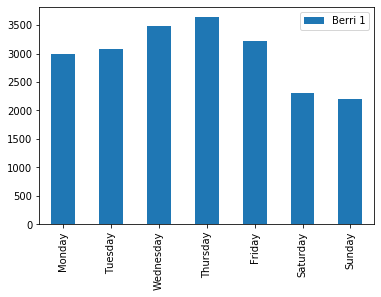

In [7]:
weekday_counts = berri_bikes.groupby("weekday").mean()
weekday_counts
# 重命名
weekday_counts.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_counts

weekday_counts.plot(kind="bar")

**一周当中每天总共有多少自行车通过**

In [8]:
bikes_avg = bikes.mean(axis=1).to_frame()
bikes_avg.columns = ["bikes_avg"]
bikes_avg.head()

,bikes_avg
Date,
2012-01-01,25.142857
2012-01-02,58.142857
2012-01-03,91.285714
2012-01-04,108.428571
2012-01-05,122.571429


In [9]:
bikes_avg.loc[:, "weekday"] = bikes_avg.index.weekday
bikes_avg.head()

,bikes_avg,weekday
Date,,
2012-01-01,25.142857,6
2012-01-02,58.142857,0
2012-01-03,91.285714,1
2012-01-04,108.428571,2
2012-01-05,122.571429,3


,bikes_avg
Monday,2269.723810
Tuesday,2268.123377
Wednesday,2564.032468
Thursday,2691.782468
Friday,2398.610390


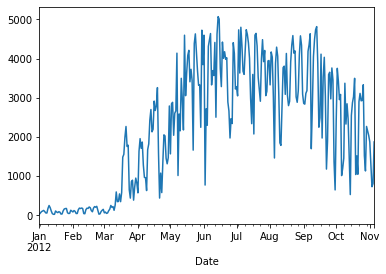

In [12]:
weekday_avg = bikes_avg.groupby("weekday").mean()
weekday_avg.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_avg.head()
bikes_avg["bikes_avg"].plot()

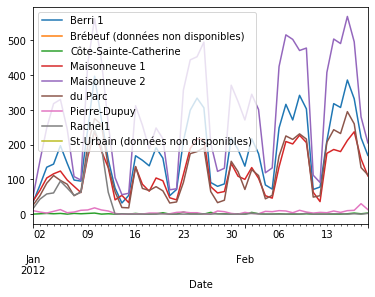

In [11]:
bikes.iloc[:50, :].plot()